In [181]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
from math import sqrt
from scipy import stats
import seaborn as sns
import datetime
from env import host, user, password

In [172]:
url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)
df.study_strategy.fillna('None', inplace=True)

def get_db_url(url="employees"):
    url = f'mysql+pymysql://{user}:{password}@{host}/{url}'
    return url

***If The P is low reject the Ho***


**False Negative Rate:** P(FN) = P(Type II Error)
False Negative: Failing to reject null hypothesis when it is false. 
i.e. there is a difference but test told you otherwise. 

**False Positive Rate:** P(FP) = P(Type I Error)
False Positive: Said there was a difference where there wasn't. 
Alpha is your false positive rate.

# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?

Will switching service providers cause network latency to increase?

$H_{0}$ Customers switching providers will either drop or not change the latency.

$H_{a}$ Cusotmers switching providers will increase network latency

P(Type II Error) Would be if the P(latency) was greater than .05 you didn't reject the $H_{0}$

P(Type I Error) Would be if the P(latency) was less than .05 and you reject the $H_{0}$

## Is the website redesign any good?

Has the website generated more sales since the redesign?

$H_{0}$ The website has generated less or equal amount of sales since the redesign

$H_{a}$ The website has gnerated more sales since the redesign

P(Type II Error) Would be if the P(Sales) was greater than .05 you didn't reject the $H_{0}$

P(Type I Error) Would be if the P(Sales) was less than .05 and you reject the $H_{0}$

## Is our television ad driving more sales?

Have we generated more sales since the television ad aired?

$H_{0}$ The television ad has earned less or equal amount of sales since airing

$H_{a}$ The television ad has earned more sales since airing.

P(Type II Error) Would be if the P(Sales) was greater than .05 you didn't reject the $H_{0}$

P(Type I Error) Would be if the P(Sales) was less than .05 and you reject the $H_{0}$

# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.

H_o: Office one and office two have the same average time to sell a house

H_a: Ace office one and office two do not take the same amount of time.  

### Plot Distributions (i.e. Histograms!)

### Set Significance Level

### Establish Hypotheses

### $H_{0}$ 
### $H_{a}$ 

### Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

### Compute test statistic and probability

### Decide if we are rejecting or fail to reject the $H_{0}$

# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.

# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
x1 = df[df.study_strategy == 'flashcards'].exam_score
x2 = df[df.study_strategy != 'flashcards'].exam_score

xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = n1 + n2 -2 

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t
p = stats.t(degf).cdf(t) * 2

In [3]:
t

-2.6252287036468456

In [4]:
p

0.01020985244923939

In [5]:
alpha = 0.05
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50)
t, p

(-2.6252287036468456, 0.01020985244923939)

# Load the mpg dataset and use it to answer the following questions:

In [6]:
df = data('mpg')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


## Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [8]:
df["Avg"] = (df["cty"] + df["hwy"])/2

In [9]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


Plot Distributions (i.e. Histograms!)

<AxesSubplot:>

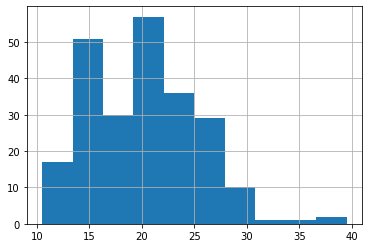

In [10]:
df.Avg.hist()

In [11]:
avg_2008 = df[df['year'] == 2008]['Avg']

<AxesSubplot:>

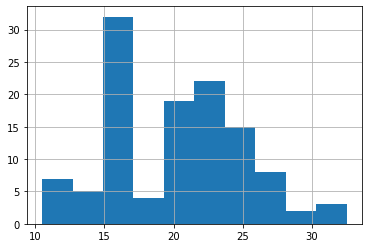

In [12]:
avg_2008.hist()

Set Significance Level

In [13]:
avg_1999 = df[df['year'] == 1999]['Avg']

<AxesSubplot:>

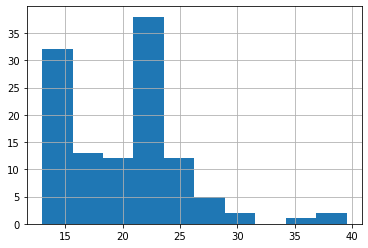

In [14]:
avg_1999.hist()

Establish Hypotheses

# $H_{0}$ There is no difference in fuel-efficiency in cars from 2008 vs 1999.
# $H_{a}$ There a difference in fuel-efficiency in cars from 2008 vs 1999.

In [15]:
aplha=.05

Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

In [16]:
avg_1999.var()

27.122605363984682

In [17]:
avg_2008.var()

24.097480106100797

Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_1samp.

In [18]:
t, p = stats.ttest_ind(avg_1999, avg_2008, equal_var = True)

In [19]:
t

0.21960177245940962

In [20]:
p

0.8263744040323578

Decide. For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate

In [21]:
p < alpha

False

### Fail to reject $H_{0}$ There is no difference in fuel-efficiency in cars from 2008 vs 1999.

## Are compact cars more fuel-efficient than the average car?

In [22]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [23]:
compact = df[df["class"] == "compact"]["Avg"]

<AxesSubplot:>

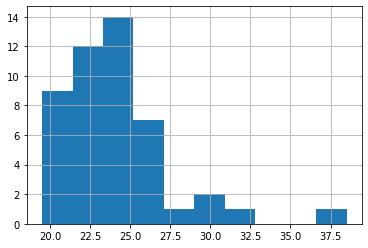

In [24]:
compact.hist()

In [25]:
average_car =  df["Avg"].mean()

# $H_{0}$ Compact cars are less or equal fuel-effiecient than the average car.
# $H_{a}$ Compact cars are more fuel-efficient than the average car.

Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

In [26]:
t, p = stats.ttest_1samp(compact, average_car)

In [27]:
t

7.896888573132535

In [28]:
p = p/2

In [29]:
p

2.0992818971585668e-10

In [30]:
if (p<alpha) & (t<0):
    print("Fail to reject H_0")
else:
    print("reject H_0")

reject H_0


## Do manual cars get better gas mileage than automatic cars?

In [31]:
auto = df[df['trans'].str.contains("auto")]

In [32]:
manual = df[df['trans'].str.contains("manual")]

In [33]:
auto.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5


In [34]:
manual.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Avg
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


<AxesSubplot:>

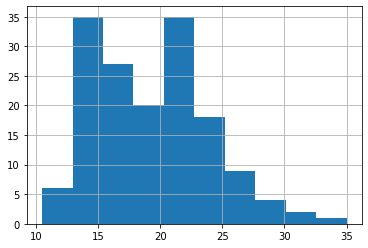

In [35]:
auto["Avg"].hist()

<AxesSubplot:>

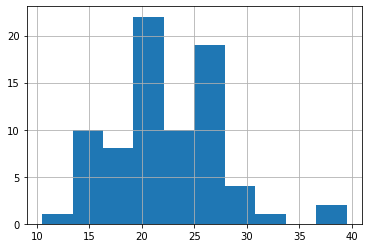

In [36]:
manual["Avg"].hist()

# $H_{0}$ Manual cars has less than or equal mileage than automatic cars. 
# $H_{a}$ Manual cars has greater mileage than automatic cars.

In [37]:
auto["Avg"].var()

21.942777233382337

In [38]:
manual["Avg"].var()

26.635167464114826

In [39]:
t, p = stats.ttest_ind(manual["Avg"], auto["Avg"], equal_var = True)

In [40]:
t

4.593437735750014

In [41]:
p

7.154374401145683e-06

In [42]:
p = p/2 #because its one tailed

In [43]:
# t<0 because our h_0 says less than or equal to
if (p<alpha) & (t<0):
    print("Fail to reject H_0")
else:
    print("reject H_0")

reject H_0


# Use the telco_churn data.

In [44]:
df = pd.read_csv("Cust_Churn_Telco.csv") 

In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Does tenure linearly correlate with monthly charges?

### Plot Distributions (i.e. Histograms!)

<AxesSubplot:>

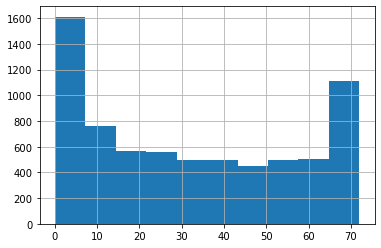

In [46]:
df['tenure'].hist()

<AxesSubplot:>

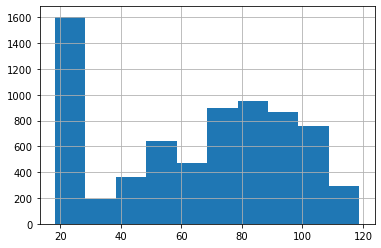

In [47]:
df['MonthlyCharges'].hist()

### Set Significance Level

In [48]:
alpha = .05

### Establish Hypotheses

### $H_{0}$ Tenure does not correlate with monthly charges
### $H_{a}$ Tenure correlates with monthly charges

### Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)???

In [49]:
df['tenure'].var()

603.1681081237256

In [50]:
df['MonthlyCharges'].var()

905.4109343405128

Assumptions maybe doesnt matter but in case it does.  Both are not normal distributed and they both have at least 30 obervations.  They do not have equal Variance. 

### Compute test statistic and probability

In [51]:
r, p = stats.pearsonr(df['tenure'], df['MonthlyCharges'])

In [52]:
r, p

(0.24789985628615002, 4.0940449915016345e-99)

Text(8, 80, 'r = 0.248')

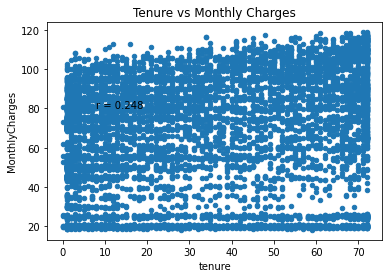

In [53]:
df.plot.scatter('tenure', 'MonthlyCharges')
plt.title('Tenure vs Monthly Charges')
plt.text(8, 80, f'r = {r:.3f}')

In [54]:
p < alpha

True

### Decide if we are rejecting or fail to reject the $H_{0}$

In [55]:
if p < alpha:
    print("we are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

we are rejecting our Null Hypothesis


## Total charges? 

### Plot Distributions (i.e. Histograms!)

<AxesSubplot:>

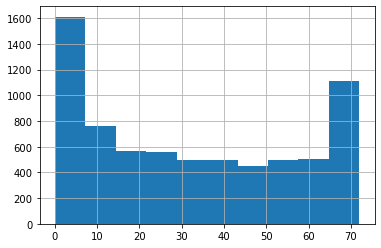

In [56]:
df['tenure'].hist()

<AxesSubplot:>

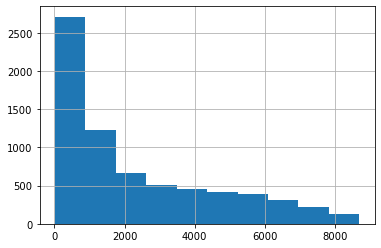

In [57]:
df['TotalCharges'].hist()

### Set Significance Level

In [58]:
alpha = .05

### Establish Hypotheses

### $H_{0}$ Tenure does not linearly correlate with total charges
### $H_{a}$ Tenure linearly correlates with total charges

In [59]:
df = pd.read_csv("Cust_Churn_Telco.csv") 

In [60]:
len(df)

7043

In [61]:
df = df[~df['TotalCharges'].isna()]

In [62]:
len(df)

7032

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Compute test statistic and probability

In [67]:
corr, p = stats.pearsonr(df['tenure'], df['TotalCharges'])

In [68]:
corr, p

(0.8258804609332018, 0.0)

### Decide if we are rejecting or fail to reject the $H_{0}$

In [72]:
if p<alpha:
    print('Rejecting the Null Hypothesis')
else:
    print("Failing to reject the Null Hypothesis")

Rejecting the Null Hypothesis


# What happens if you control for Phone and Total Charges?

### $H_{0}$ Tenure with phone service, does not correlate with total charges
### $H_{a}$ Tenure with phone service, does correlates with total charges

In [128]:
df = pd.read_csv("Cust_Churn_Telco.csv")
df = df[~df['TotalCharges'].isna()]
new_df = df

In [154]:
phone_customers = df[df.PhoneService == "Yes"]
tenure_with_phone = phone_customers["tenure"]
totalcharges_with_phone = phone_customers["TotalCharges"]

In [108]:
corr, p = stats.pearsonr(tenure_with_phone, totalcharges_with_phone)

In [109]:
corr, p

(0.8298393210699411, 0.0)

In [111]:
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


### $H_{0}$ Tenure with no phone service, does not linearly correlate with total charges
### $H_{a}$ Tenure with no phone service, linearly correlates with total charges

In [112]:
non_phone = df[df.PhoneService == "No"]
tenure_with_no = non_phone["tenure"]
totalcharges_with_no = non_phone["TotalCharges"]

In [113]:
corr, p = stats.pearsonr(tenure_with_no, totalcharges_with_no)

In [114]:
corr, p

(0.9534228506954516, 0.0)

In [115]:
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


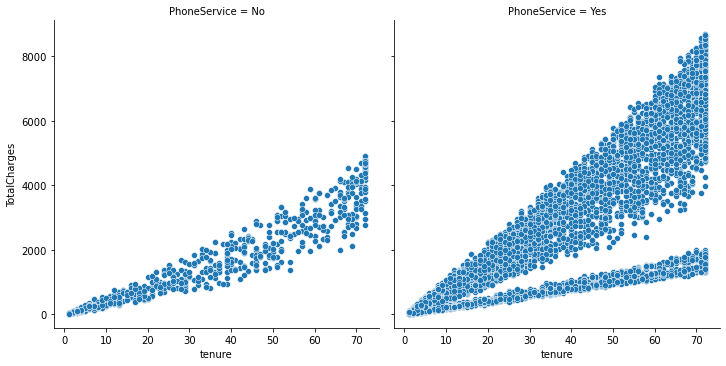

In [134]:
sns.relplot(x ="tenure", y ="TotalCharges", col="PhoneService", data = new_df)

# What happens if you control for internet service and Total Charges

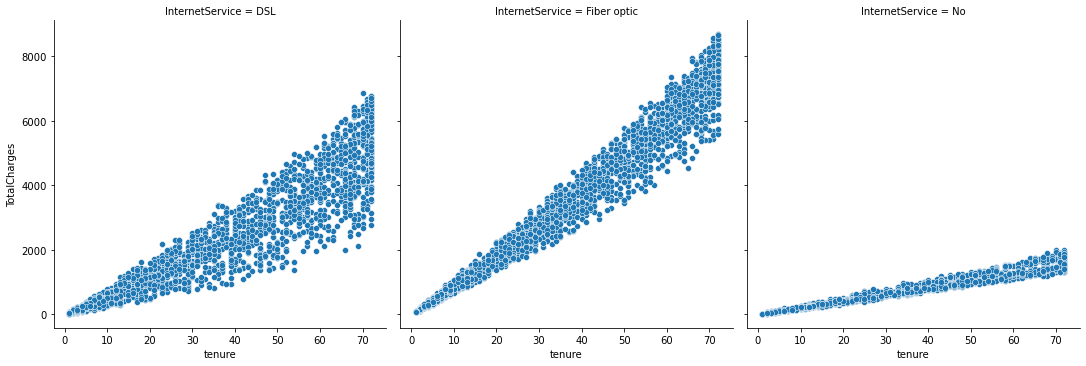

In [136]:
sns.relplot(x ="tenure", y ="TotalCharges", col="InternetService", data = new_df)

### $H_{0}$ Tenure with DSL does not linearly correlate with total charges
### $H_{a}$ Tenure with DSL linearly correlates with total charges

In [145]:
dsl_customers = df[df.InternetService == "DSL"]
tenure_with_dsl = dsl_customers["tenure"]
totalcharges_with_dsl = dsl_customers["TotalCharges"]

In [146]:
corr, p = stats.pearsonr(tenure_with_dsl, totalcharges_with_dsl)
corr, p

In [147]:
corr, p

(0.9411848215629786, 0.0)

In [148]:
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


### $H_{0}$ Tenure with Fiber does not linearly correlate with total charges
### $H_{a}$ Tenure with Fiber linearly correlates with total charges

In [143]:
fiber_customers = df[df.InternetService == "Fiber optic"]
tenure_with_fiber = fiber_customers["tenure"]
totalcharges_with_fiber = fiber_customers["TotalCharges"]

In [150]:
corr, p = stats.pearsonr(tenure_with_fiber, totalcharges_with_fiber)
corr, p
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


### $H_{0}$ Tenure with No Internet does not linearly correlate with total charges
### $H_{a}$ Tenure with No Internet linearly correlates with total charges

In [144]:
no_internet_customers = df[df.InternetService == "No"]
tenure_with_no_internet = no_internet_customers["tenure"]
totalcharges_with_no_internet = no_internet_customers["TotalCharges"]

In [151]:
corr, p = stats.pearsonr(tenure_with_no_internet, totalcharges_with_no_internet)
corr, p
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


# What happens if you control for Phone and Monthly Charges?

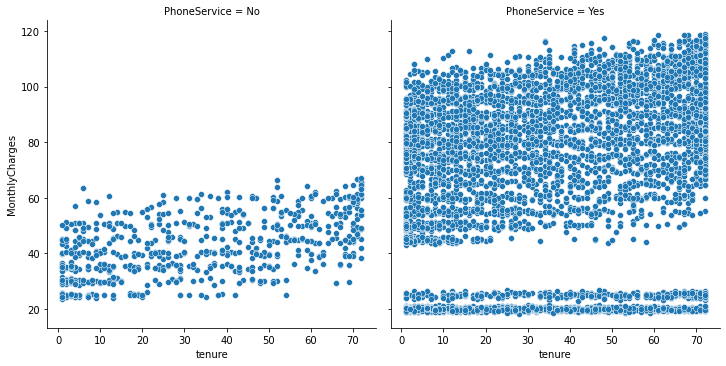

In [153]:
sns.relplot(x ="tenure", y ="MonthlyCharges", col="PhoneService", data = new_df)

### $H_{0}$ Tenure with phone service, does not correlate with Monthly charges
### $H_{a}$ Tenure with phone service, does correlates with Monthly charges

In [155]:
phone_customers = df[df.PhoneService == "Yes"]
tenure_with_phone = phone_customers["tenure"]
Monthly_charges_with_phone = phone_customers["MonthlyCharges"]
corr, p = stats.pearsonr(tenure_with_phone, Monthly_charges_with_phone)
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


### $H_{0}$ Tenure with no phone service, does not correlate with Monthly charges
### $H_{a}$ Tenure with no phone service, does correlates with Monthly charges

In [157]:
phone_customers = df[df.PhoneService == "No"]
tenure_with_no_phone = phone_customers["tenure"]
Monthly_charges_with_no_phone = phone_customers["MonthlyCharges"]
corr, p = stats.pearsonr(tenure_with_no_phone, Monthly_charges_with_no_phone)
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


# What happens if you control for internet service and Monthly Charges

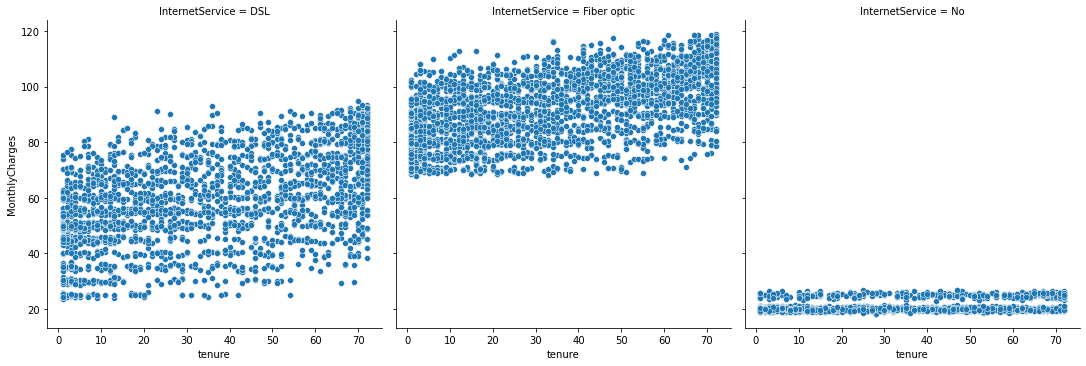

In [152]:
sns.relplot(x ="tenure", y ="MonthlyCharges", col="InternetService", data = new_df)

### $H_{0}$ Tenure with DSL does not linearly correlate with Monthly charges
### $H_{a}$ Tenure with DSL linearly correlates with Monthly charges

In [159]:
dsl_customers = df[df.InternetService == "DSL"]
tenure_with_dsl = dsl_customers["tenure"]
Monthly_charges_with_dsl = dsl_customers["MonthlyCharges"]
corr, p = stats.pearsonr(tenure_with_dsl, Monthly_charges_with_dsl)
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


### $H_{0}$ Tenure with Fiber does not linearly correlate with Monthly charges
### $H_{a}$ Tenure with Fiber linearly correlates with Monthly charges

In [161]:
fiber_customers = df[df.InternetService == "Fiber optic"]
tenure_with_fiber = fiber_customers["tenure"]
Monthly_charges_with_fiber = fiber_customers["MonthlyCharges"]
corr, p = stats.pearsonr(tenure_with_fiber, Monthly_charges_with_fiber)
if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis


### $H_{0}$ Tenure with No Internet does not linearly correlate with Monthly charges
### $H_{a}$ Tenure with No Internet linearly correlates with Monthly charges

In [170]:
no_internet_customers = df[df.InternetService == "No"]
tenure_with_no_internet = no_internet_customers["tenure"]
Monthly_with_no_internet = no_internet_customers["MonthlyCharges"]
corr, p = stats.pearsonr(tenure_with_no_internet, Monthly_with_no_internet)
if p<alpha:
    print(f"Reject the Null Hypothesis. p={p} < {alpha}")
else:
    print("Fail Reject the Null Hypothesis")

Reject the Null Hypothesis. p=4.896604599951957e-44 < 0.05


# Use the employees database.

In [177]:
employee = pd.read_sql("select * from employees join salaries on employees.emp_no = salaries.emp_no where salaries.to_date > now()", get_db_url())

In [178]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   emp_no      240124 non-null  int64 
 7   salary      240124 non-null  int64 
 8   from_date   240124 non-null  object
 9   to_date     240124 non-null  object
dtypes: int64(3), object(7)
memory usage: 18.3+ MB


In [186]:
df['tenure'] = ((2021-8-10 - 2021-7-10)/np.timedelta64(1, 'M'))

UFuncTypeError: ufunc 'true_divide' cannot use operands with types dtype('int64') and dtype('<m8[M]')